In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('sign_mnist_train.csv') 
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [3]:
column_val = 'pixel{value}'
for i in range(1, 785):
    if (data[column_val.format(value=i)] < 0).any() or (data[column_val.format(value=i)] > 255).any():
        print("Unexpected value encountered in pixel column {value}".format(value=i))

In [4]:
y_train = data['label']
X_train = data.drop(columns = 'label')

In [5]:
test = pd.read_csv('sign_mnist_test.csv')
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [6]:
y_test = test['label']
X_test = test.drop(columns = 'label')

In [7]:
from tensorflow.keras import layers, models

In [8]:
# Normalize the data
X_train /= 255.0
X_test /= 255.0

In [9]:
X_train = X_train.values
X_test = X_test.values

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

# Model 1

In [10]:
model_1 = models.Sequential();
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

2022-06-07 20:42:00.851780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model_1.add(layers.Flatten())
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(25))

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [13]:
model_1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model_1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
858/858 [==============================] - 30s 34ms/step - loss: 1.2860 - accuracy: 0.6010 - val_loss: 0.6904 - val_accuracy: 0.7797
Epoch 2/10
858/858 [==============================] - 35s 40ms/step - loss: 0.1384 - accuracy: 0.9594 - val_loss: 0.4325 - val_accuracy: 0.8876
Epoch 3/10
858/858 [==============================] - 32s 37ms/step - loss: 0.0351 - accuracy: 0.9913 - val_loss: 0.5326 - val_accuracy: 0.8610
Epoch 4/10
858/858 [==============================] - 42s 49ms/step - loss: 0.0142 - accuracy: 0.9968 - val_loss: 0.3457 - val_accuracy: 0.9221
Epoch 5/10
858/858 [==============================] - 45s 52ms/step - loss: 0.0259 - accuracy: 0.9923 - val_loss: 0.4868 - val_accuracy: 0.9035
Epoch 6/10
858/858 [==============================] - 34s 40ms/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 0.3970 - val_accuracy: 0.9169
Epoch 7/10
858/858 [==============================] - 42s 49ms/step - loss: 4.4031e-04 - accuracy: 1.0000 - val_loss: 0.4677 - val_accur

225/225 - 1s - loss: 0.4483 - accuracy: 0.9233 - 1s/epoch - 6ms/step


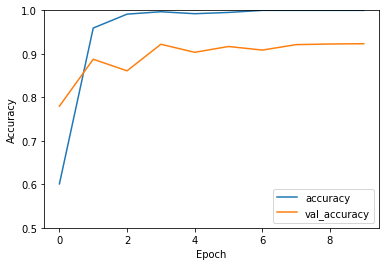

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_1.evaluate(X_test,  y_test, verbose=2)

In [15]:
print(test_acc)

0.9233129024505615


# Model 2 

In [16]:
# This model has an extra maxpooling layer
model_2 = models.Sequential();
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 64)        

In [18]:
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_2.add(layers.Dense(25, kernel_regularizer='l2'))

In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 64)        

In [20]:
model_2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# history = model_3_max_pool.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[es])

history = model_2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
858/858 [==============================] - 27s 31ms/step - loss: 2.0986 - accuracy: 0.4023 - val_loss: 1.2500 - val_accuracy: 0.6358
Epoch 2/10
858/858 [==============================] - 29s 34ms/step - loss: 0.8001 - accuracy: 0.7979 - val_loss: 0.9172 - val_accuracy: 0.7486
Epoch 3/10
858/858 [==============================] - 29s 34ms/step - loss: 0.5165 - accuracy: 0.8992 - val_loss: 0.8475 - val_accuracy: 0.8143
Epoch 4/10
858/858 [==============================] - 29s 34ms/step - loss: 0.3700 - accuracy: 0.9481 - val_loss: 0.8025 - val_accuracy: 0.8162
Epoch 5/10
858/858 [==============================] - 28s 33ms/step - loss: 0.2854 - accuracy: 0.9724 - val_loss: 0.7838 - val_accuracy: 0.8314
Epoch 6/10
858/858 [==============================] - 29s 33ms/step - loss: 0.2383 - accuracy: 0.9811 - val_loss: 0.7559 - val_accuracy: 0.8399
Epoch 7/10
858/858 [==============================] - 29s 34ms/step - loss: 0.2022 - accuracy: 0.9873 - val_loss: 0.6941 - val_accuracy:

225/225 - 2s - loss: 0.6405 - accuracy: 0.8696 - 2s/epoch - 8ms/step


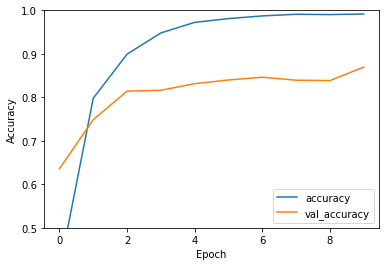

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_2.evaluate(X_test,  y_test, verbose=2)

In [22]:
print(test_acc)

0.8696318864822388


# Model 3: dropout

In [23]:
model_3 = models.Sequential();

model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))


model_3.add(layers.Flatten())
model_3.add(layers.Dense(100, activation='relu'))
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(25, activation="relu"))

In [24]:
model_3.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model_3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
858/858 [==============================] - 28s 32ms/step - loss: 2.0817 - accuracy: 0.4280 - val_loss: 1.9058 - val_accuracy: 0.4573
Epoch 2/10
858/858 [==============================] - 27s 32ms/step - loss: 1.2451 - accuracy: 0.6440 - val_loss: 1.5122 - val_accuracy: 0.5643
Epoch 3/10
858/858 [==============================] - 28s 32ms/step - loss: 1.0585 - accuracy: 0.6851 - val_loss: 1.3937 - val_accuracy: 0.6060
Epoch 4/10
858/858 [==============================] - 28s 32ms/step - loss: 0.9391 - accuracy: 0.7156 - val_loss: 1.3452 - val_accuracy: 0.6089
Epoch 5/10
858/858 [==============================] - 28s 32ms/step - loss: 0.9229 - accuracy: 0.7174 - val_loss: 1.3417 - val_accuracy: 0.6093
Epoch 6/10
858/858 [==============================] - 27s 32ms/step - loss: 0.9191 - accuracy: 0.7183 - val_loss: 1.4619 - val_accuracy: 0.6088
Epoch 7/10
858/858 [==============================] - 27s 32ms/step - loss: 0.9151 - accuracy: 0.7183 - val_loss: 1.3635 - val_accuracy:

225/225 - 1s - loss: 1.4048 - accuracy: 0.5989 - 1s/epoch - 6ms/step


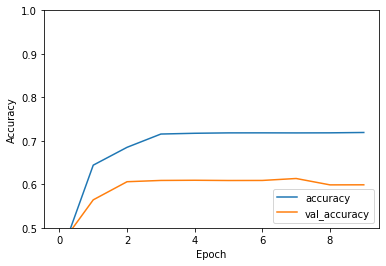

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_3.evaluate(X_test,  y_test, verbose=2)

In [26]:
print(test_acc)

0.5988566875457764


# Model 4: L2 Regularization 

In [27]:
model_4 = models.Sequential();
model_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [28]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [29]:
model_4.add(layers.Flatten())
model_4.add(layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_4.add(layers.Dense(25, kernel_regularizer='l2'))

In [30]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [31]:
model_4.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model_4.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
858/858 [==============================] - 25s 28ms/step - loss: 1.5600 - accuracy: 0.6046 - val_loss: 0.9727 - val_accuracy: 0.7559
Epoch 2/10
858/858 [==============================] - 25s 29ms/step - loss: 0.4183 - accuracy: 0.9471 - val_loss: 0.6430 - val_accuracy: 0.8726
Epoch 3/10
858/858 [==============================] - 25s 29ms/step - loss: 0.2696 - accuracy: 0.9818 - val_loss: 0.6580 - val_accuracy: 0.8560
Epoch 4/10
858/858 [==============================] - 24s 28ms/step - loss: 0.2151 - accuracy: 0.9873 - val_loss: 0.5245 - val_accuracy: 0.9006
Epoch 5/10
858/858 [==============================] - 24s 29ms/step - loss: 0.1775 - accuracy: 0.9910 - val_loss: 0.4125 - val_accuracy: 0.9158
Epoch 6/10
858/858 [==============================] - 25s 29ms/step - loss: 0.1505 - accuracy: 0.9925 - val_loss: 0.4143 - val_accuracy: 0.9116
Epoch 7/10
858/858 [==============================] - 24s 28ms/step - loss: 0.1428 - accuracy: 0.9903 - val_loss: 0.5126 - val_accuracy:

225/225 - 1s - loss: 0.3353 - accuracy: 0.9374 - 1s/epoch - 6ms/step


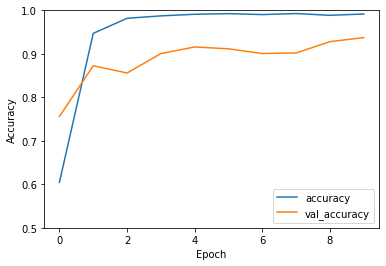

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_4.evaluate(X_test,  y_test, verbose=2)

In [33]:
print(test_acc)

0.937395453453064


# Model 5: early stop 

In [34]:
model_5 = models.Sequential();
model_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [35]:
model_5.add(layers.Flatten())
model_5.add(layers.Dense(64, activation='relu'))
model_5.add(layers.Dense(25))

In [36]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [37]:
model_5.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model_5.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/10
858/858 [==============================] - 25s 29ms/step - loss: 1.1772 - accuracy: 0.6313 - val_loss: 0.6495 - val_accuracy: 0.7864
Epoch 2/10
858/858 [==============================] - 24s 28ms/step - loss: 0.1434 - accuracy: 0.9577 - val_loss: 0.5888 - val_accuracy: 0.8482
Epoch 3/10
858/858 [==============================] - 25s 29ms/step - loss: 0.0321 - accuracy: 0.9933 - val_loss: 0.5995 - val_accuracy: 0.8703
Epoch 4/10
858/858 [==============================] - 28s 32ms/step - loss: 0.0197 - accuracy: 0.9946 - val_loss: 0.6081 - val_accuracy: 0.8636
Epoch 5/10
858/858 [==============================] - 35s 40ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.5033 - val_accuracy: 0.9013
Epoch 6/10
858/858 [==============================] - 32s 37ms/step - loss: 5.4363e-04 - accuracy: 1.0000 - val_loss: 0.4931 - val_accuracy: 0.9076
Epoch 7/10
858/858 [==============================] - 32s 37ms/step - loss: 2.7619e-04 - accuracy: 1.0000 - val_loss: 0.5641 - val_a

225/225 - 2s - loss: 0.5568 - accuracy: 0.8915 - 2s/epoch - 7ms/step


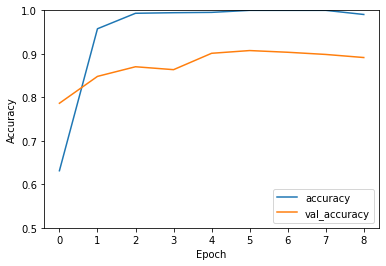

In [38]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_5.evaluate(X_test,  y_test, verbose=2)

In [39]:
print(test_acc)

0.8915225863456726


# Model 6

In [40]:
# This model has an extra maxpooling layer
model_6 = models.Sequential();
model_6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 1, 1, 64)        

In [41]:
model_6.add(layers.Flatten())
model_6.add(layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_6.add(layers.Dense(25, kernel_regularizer='l2'))

In [42]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 1, 1, 64)        

In [43]:
model_6.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model_6.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/10
858/858 [==============================] - 30s 34ms/step - loss: 2.0710 - accuracy: 0.4019 - val_loss: 1.2886 - val_accuracy: 0.6443
Epoch 2/10
858/858 [==============================] - 29s 33ms/step - loss: 0.8106 - accuracy: 0.7857 - val_loss: 0.9065 - val_accuracy: 0.7646
Epoch 3/10
858/858 [==============================] - 29s 34ms/step - loss: 0.5124 - accuracy: 0.8954 - val_loss: 0.7943 - val_accuracy: 0.8076
Epoch 4/10
858/858 [==============================] - 29s 34ms/step - loss: 0.3547 - accuracy: 0.9500 - val_loss: 0.8545 - val_accuracy: 0.7761
Epoch 5/10
858/858 [==============================] - 29s 34ms/step - loss: 0.2690 - accuracy: 0.9768 - val_loss: 0.7654 - val_accuracy: 0.8196
Epoch 6/10
858/858 [==============================] - 29s 34ms/step - loss: 0.2260 - accuracy: 0.9835 - val_loss: 0.6638 - val_accuracy: 0.8579
Epoch 7/10
858/858 [==============================] - 30s 34ms/step - loss: 0.1868 - accuracy: 0.9903 - val_loss: 0.6968 - val_accuracy:

225/225 - 2s - loss: 0.6668 - accuracy: 0.8622 - 2s/epoch - 8ms/step


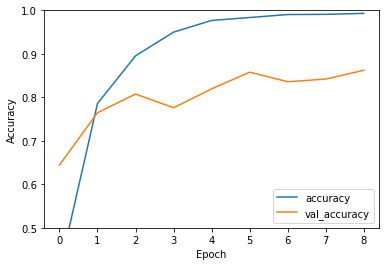

In [44]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_6.evaluate(X_test,  y_test, verbose=2)

In [45]:
print(test_acc)

0.8622420430183411
